In [1]:
import actonet
import biolqm

This notebook has been executed using the docker image `algorecell/algorecell-docker` built on `2019-12-03`

In [2]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

In [9]:
bn = biolqm.to_minibn(biolqm.booleanize(lqm)).simplify()
bn

AKT <- PI3K
ATM_b1 <- DNAdamage|(ATM_b1&ATM_b2)
ATM_b2 <- ATM_b1&DNAdamage&E2F1_b1
Apoptosis_b1 <- (Apoptosis_b1&Apoptosis_b2)|(!Apoptosis_b1&E2F1_b1&E2F1_b2)|(!Apoptosis_b1&!E2F1_b1&TP53)|(!Apoptosis_b1&!E2F1_b2&TP53)|(!Apoptosis_b2&E2F1_b1&E2F1_b2)|(!Apoptosis_b2&!E2F1_b1&TP53)|(!Apoptosis_b2&!E2F1_b2&TP53)
Apoptosis_b2 <- Apoptosis_b1&E2F1_b1&E2F1_b2
CDC25A <- (!CHEK1_2_b1&E2F1_b1&!RBL2)|(!CHEK1_2_b1&E2F3_b1&!RBL2)
CHEK1_2_b1 <- ATM_b1|(CHEK1_2_b1&CHEK1_2_b2)
CHEK1_2_b2 <- ATM_b1&CHEK1_2_b1&E2F1_b1
CyclinA <- (CDC25A&E2F1_b1&!RBL2&!p21CIP)|(CDC25A&E2F3_b1&!RBL2&!p21CIP)
CyclinD1 <- (AKT&!p16INK4a&!p21CIP)|(RAS&!p16INK4a&!p21CIP)
CyclinE1 <- (CDC25A&E2F1_b1&!RBL2&!p21CIP)|(CDC25A&E2F3_b1&!RBL2&!p21CIP)
DNAdamage <- DNAdamage
E2F1_b1 <- (E2F1_b1&E2F1_b2)|(!E2F1_b1&E2F3_b1&!RB1&!RBL2)|(!E2F1_b2&E2F3_b1&!RB1&!RBL2)|(RAS&!RB1&!RBL2)
E2F1_b2 <- (ATM_b1&ATM_b2&CHEK1_2_b1&CHEK1_2_b2&E2F1_b1&E2F3_b1&E2F3_b2&!RB1&!RBL2)|(ATM_b1&ATM_b2&CHEK1_2_b1&CHEK1_2_b2&E2F1_b1&RAS&!RB1&!RBL2)
E2F3_b1 <- (

In [4]:
act = actonet.load(bn)

In [5]:
inputs = {"DNAdamage": 0, "FGFR3_stimulus": 1, "EGFR_stimulus": 0, "GrowthInhibitors": 1}
spec = {"Proliferation": 1, "Apoptosis_b1": 0, "Apoptosis_b2": 0, "Growth_Arrest": 0}
s = act.reprogramming_fixpoints(spec, inputs=inputs, maxsize=2)
s

[FromCondition('input', PermanentPerturbation(p16INK4a=0, p21CIP=0)),
 FromCondition('input', PermanentPerturbation(RBL2=0, p21CIP=0)),
 FromCondition('input', PermanentPerturbation(CyclinE1=1)),
 FromCondition('input', PermanentPerturbation(CyclinD1=1, p21CIP=0)),
 FromCondition('input', PermanentPerturbation(EGFR=1, RBL2=0)),
 FromCondition('input', PermanentPerturbation(EGFR=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(AKT=1, RBL2=0)),
 FromCondition('input', PermanentPerturbation(AKT=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(CyclinA=1, Growth_Arrest=0)),
 
 FromCondition('input', PermanentPerturbation(Growth_Arrest=0, Proliferation=1)),
 FromCondition('input', PermanentPerturbation(CyclinD1=1, PI3K=1)),
 FromCondition('input', PermanentPerturbation(PI3K=1, RBL2=0)),
 FromCondition('input', PermanentPerturbation(PI3K=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(AKT=1, CyclinD1=1)),
 FromCondition('input', PermanentPerturbation

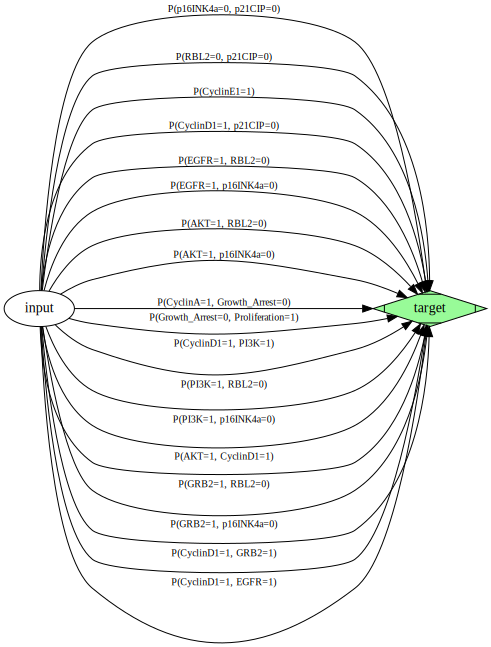

In [6]:
s.as_graph()

In [7]:
s.as_table()

,EGFR,CyclinD1,AKT,RBL2,GRB2,p16INK4a,p21CIP,PI3K,Growth_Arrest,CyclinA,Proliferation,CyclinE1
0,1,1,,,,,,,,,,
1,,,1,0,,,,,,,,
2,,,,0,1,,,,,,,
3,,,1,,,0,,,,,,
4,,,,0,,,0,,,,,
5,,,,,,0,0,,,,,
6,,1,,,,,,1,,,,
7,,1,1,,,,,,,,,
8,,,,,,,,,0,1,,
9,,,,,,,,,0,,1,


In [8]:
s.perturbations()

{(PermanentPerturbation(AKT=1, CyclinD1=1),),
 (PermanentPerturbation(AKT=1, RBL2=0),),
 (PermanentPerturbation(AKT=1, p16INK4a=0),),
 (PermanentPerturbation(CyclinA=1, Growth_Arrest=0),),
 (PermanentPerturbation(CyclinD1=1, EGFR=1),),
 (PermanentPerturbation(CyclinD1=1, GRB2=1),),
 (PermanentPerturbation(CyclinD1=1, PI3K=1),),
 (PermanentPerturbation(CyclinD1=1, p21CIP=0),),
 (PermanentPerturbation(CyclinE1=1),),
 (PermanentPerturbation(EGFR=1, RBL2=0),),
 (PermanentPerturbation(EGFR=1, p16INK4a=0),),
 (PermanentPerturbation(GRB2=1, RBL2=0),),
 (PermanentPerturbation(GRB2=1, p16INK4a=0),),
 (PermanentPerturbation(Growth_Arrest=0, Proliferation=1),),
 (PermanentPerturbation(PI3K=1, RBL2=0),),
 (PermanentPerturbation(PI3K=1, p16INK4a=0),),
 (PermanentPerturbation(RBL2=0, p21CIP=0),),
 (PermanentPerturbation(p16INK4a=0, p21CIP=0),)}